# Tarea 3 ,parte 1: GAIA!

1. 
   La misión Gaia lanzada el 19 de diciembre del 2013 tiene como misión principal construir un mapa/catalogo tridimensional de nuestra galaxia, observando alrededor de $\small 10^9$ objetos celestes (aproximadamente 1% del total). Cada uno de estos será obervado multiples veces en un transcurso de a lo menos 5 años. 
  
  Con estas observaciones se encontraran: posiciones, velocidades radiales, exoplanetas en transito entre otras cosas.
   
   La misión esta cargada con un espectrógrafo que permite obtener temperatura, gravedad y metalicidad de las estrellas observadas.
    
   Los datos obtenidos han sido liberados a partir del 14 de septiembre de este año, ya que la misión no ha sido completada el catálogo se irá actualizando en intervalos de un año con nuevos datos. Inicialmente los catalogos entregados contienen posiciones, velocidades angulares de ascensión recta y declinación, magnitudes en la banda GAIA, ángulos de paralaje y los errores correspondientes. Esto se puede ver en el header más abajo.
  
  El nombre del catálogo disponible hasta ahora es TGAS.

2.
    Es una revisión del catalogo RAVE, usando los mismos observables pero manipulandolos de distinta manera para obtener resultados más precisos.
    
En si el catalogo contiene posiciones, velocidades radiales, temperaturas efectivas, gravedad superficial y metalicidades de siete elementos. Todo esto se indica en el header del catalogo.
     
    

3.Luego de clonado e instalado con los comandos dados en el readme.txt, se crea una environment variable con el comando " export GAIA_TOOLS_DATA="directorio donde se guardaran los catalogos".

4.Importamos la libreria y cargamos los catalogos TGAS y RAVE-ON con los comandos entregados en las instrucciones.

In [1]:
import gaia_tools.load as gload
tgas_cat= gload.tgas()
raveon_cat= gload.raveon()

/home/zapredfield/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


5.Para entender que tiene cada catalogo es buena idea investigar los headers:

TGAS:

In [2]:
from astropy.io.fits import getdata
dtgas1,htgas1 = getdata('Gaia/tgas_source/fits/TgasSource_000-000-000.fits',1,header="True")

In [3]:
htgas1

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional table                            
NAXIS1  =                  336 / width of table in bytes                        
NAXIS2  =               134865 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group                                 
TFIELDS =                   59 / number of columns                              
EXTNAME = 'TgasSource_000-000-000.fits' / table name                            
TTYPE1  = 'hip     '           / label for column 1                             
TFORM1  = 'J       '           / format for column 1                            
TNULL1  =          -2147483648 / blank value for column 1                       
TUCD1   = 'meta.id.cross'   

El catalogo TGAS contiene posiciones, paralajes, ángulos, velocidad angular, flujo y magnitudes.

In [4]:
drave,hrave = getdata('raveon/DR5/RAVE-on-v1.0.fits',1,header="True")

In [5]:
hrave

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  344 / length of dimension 1                          
NAXIS2  =               520701 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   58 / number of table fields                         
TTYPE1  = 'RAVE_OBS_ID'                                                         
TFORM1  = '31A     '                                                            
TTYPE2  = 'RAVEID  '                                                            
TFORM2  = '16A     '                                                            
TTYPE3  = 'RA      '        

Los datos de RaveOn de interes por ahora son posiciones (RA,DEC) y temperatura efectiva

Con todo esto el siguiente paso es encontrar un match de posiciones entre ambos catalogos para obtener la temperatura efectiva y magnitud en la banda GAIA de cada estrella.

6.Match.

In [6]:
from gaia_tools import xmatch
#help(xmatch)
m2,m1,sep= xmatch.xmatch(drave,dtgas1,epoch1=2000.0,epoch2=2015.0)

Revisando los valores de magnitud y temperatura para algunas de las estrellas obtenemos:

In [7]:
tg1=dtgas1[m1]['phot_g_mean_mag']
rave1=drave[m2]['Teff']
for i in range(0,len(m1)):
    print "Mag:",tg1[i],"Teff:",rave1[i]

Mag: 9.68818581617 Teff: 5786.16889732
Mag: 11.1358076917 Teff: nan
Mag: 8.74505568251 Teff: 6000.03417088
Mag: 11.4196197824 Teff: 4968.46534593
Mag: 9.29168046058 Teff: 5861.39237717
Mag: 8.08421241999 Teff: 6708.52850734
Mag: 9.39384832149 Teff: 6003.68228879
Mag: 10.6631484472 Teff: 5379.00317046
Mag: 10.2635953433 Teff: 5855.91466921
Mag: 9.89911405958 Teff: 5740.51819611
Mag: 10.1724878112 Teff: 5627.71649189
Mag: 10.3308829845 Teff: 5716.11441588
Mag: 11.4196223197 Teff: 4512.06086797
Mag: 10.894255067 Teff: 4961.95383099
Mag: 8.52681191678 Teff: 6774.92012851
Mag: 8.85899861128 Teff: 6367.38096895
Mag: 8.01308795019 Teff: nan
Mag: 8.85790719557 Teff: 6285.92947766
Mag: 10.627202829 Teff: 5211.60226571
Mag: 8.11836735136 Teff: nan
Mag: 9.76309247078 Teff: 5795.26853714
Mag: 9.02342350637 Teff: 6064.75951997
Mag: 9.32165361579 Teff: 6148.05272237
Mag: 9.6642019845 Teff: 5750.91256025
Mag: 9.88395775122 Teff: 5546.65986371
Mag: 8.02215832905 Teff: nan
Mag: 10.1565458618 Teff: 5550

A continuación se hará con todos los datos tomados directamente de los catalogos descargados:

Recordemos que solo nos interesan datos con S/N>10 respecto al paralaje y que las magnitudes de gaia son aparentes, luego debemos transformarlas a absolutas con el valor de ángulo de paralaje:

Primero un match entre los catálogos completos:

In [8]:
m1,m2,sep= xmatch.xmatch(raveon_cat,tgas_cat,colRA2='ra',colDec2='dec',epoch1=2000.0,epoch2=2015.0)

Se omiten observaciones con S/N<10 y luego se transforman sus magnitudes aparentes dadas en los catalogos a absolutas por medio del ángulo de paralaje.

In [9]:
import numpy as np
T=raveon_cat[m1]["TEFF"] #Temperaturas
Map=tgas_cat[m2]["phot_g_mean_mag"]#magnitudes aparentes
Prll=tgas_cat[m2]["parallax"] #parallax
Prllerr=tgas_cat[m2]["parallax_error"] #parallax error
Mabs=[] #magnitud absoluta
Tfin=[] #Las temperaturas que nos quedaremos luego del filtro S/N
for i in range(0,len(m1)):
    if (Prll[i]/Prllerr[i])>10: #S/N>10
        mabs=Map[i]-5*(np.log10(1000/Prll[i])-1) #magnitud absoluta
        Mabs.append(mabs)
        Tfin.append(T[i])

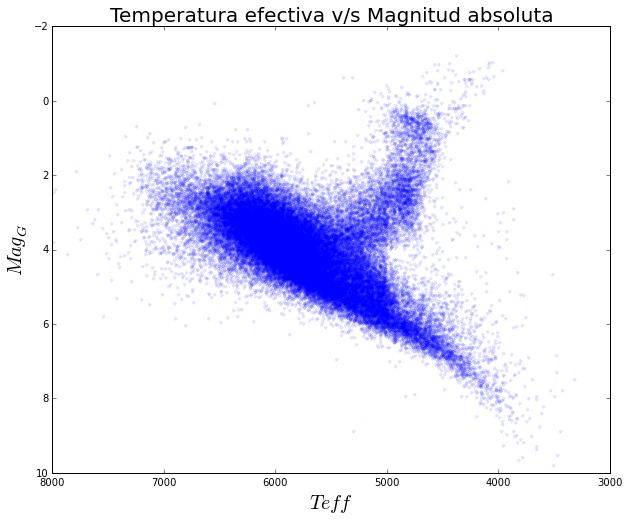

In [10]:
import matplotlib.pyplot as plt #ploteo
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)
plt.xlabel("$Teff$",size=20)
plt.ylabel("$Mag_G$",size=20)
plt.plot(Tfin,Mabs,".",alpha=0.1)
plt.xlim(3000,8000)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.title("Temperatura efectiva v/s Magnitud absoluta",size=20)
plt.show()

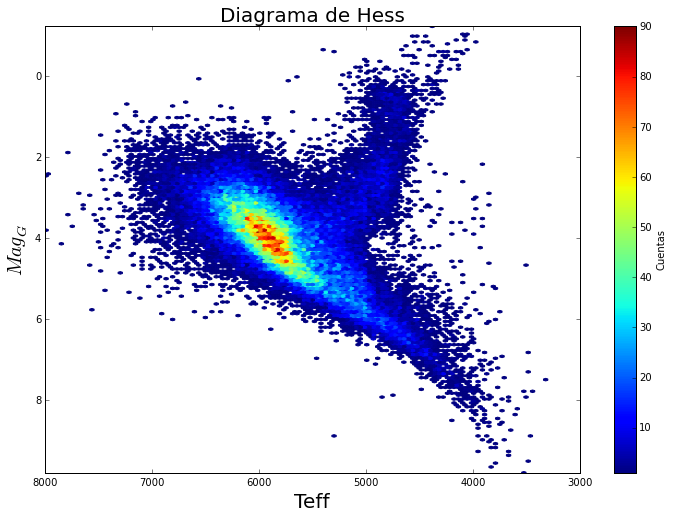

In [11]:
plt.rcParams['figure.figsize'] = (12, 8) #plote hess
plt.hexbin(Tfin,Mabs,gridsize=200,mincnt=1)
leg1=plt.colorbar()
leg1.set_label('Cuentas')

ax = plt.gca()

ax.invert_yaxis()
plt.title("Diagrama de Hess",size=20)
plt.xlabel("Teff",size=20)
plt.ylabel("$Mag_G$",size=20)
plt.xlim(3000,8000)
plt.gca().invert_xaxis()
plt.show()


7.
    De TGAS se obtiene la velocidad angular en la declinación y ascension recta, $\mu_\alpha$,$\mu_\delta$ y en Rave-On esta la velocidad radial heliocentrica $V_r$ 

In [12]:
ua=tgas_cat[m2]["pmra"]   #Velocidad angular ascension recta
ud=tgas_cat[m2]["pmdec"]  #Velocidad angular declinacion
vr=raveon_cat[m1]["HRV"]  #Velocidad radial
a=raveon_cat[m1]["RA"]      #ascension recta
d=raveon_cat[m1]["DEC"]     #declinacion
Prll=tgas_cat[m2]["parallax"] #paralaje
Prllerr=tgas_cat[m2]["parallax_error"]#paralaje error

A continuación se utilizan las transformaciones a coordenadas rectangulares dada en Bovy et al 2009 (p.1797).

In [13]:
#se deben transformar de mili arcs a arcs
ua=ua*10**(-3)
ud=ud*10**(-3)
Prll=Prll*10**(-3)
Prllerr=Prllerr*10**(-3)

Existen otras 3 constantes que no definimos previamente, $\delta_{NGP}=27.13^{\circ}$,$\alpha_{NGP}=12h51.4m$ y $\theta=123^{\circ}$, son respectivamente, delinación y ascensión recta del polo norte galáctico y ángulo entre el plano galáctico y ecuatorial. 

Ya que las posiciones fueron tomadas de RaveOn se necesita estas coordenadas para el sistema J2000, las cuales 

In [14]:
def veloc(vr,ua,ud,a,d,par):
    k=4.74047
    th=2.1467 #inclinacion galaxia-ecuador
    angp=3.3658 #RA polo norte G
    dngp=0.4735 #declinacion polo norte G
    a=np.deg2rad(a) #RA objeto
    d=np.deg2rad(d) #dec objeto
    matriz=np.matrix([[vr],[(k/par)*ua],[(k/par)*ud]])

    #Transformaciones matriciales dadas en Bovy 2009
    
    alfas=np.matrix([[np.cos(a), -np.sin(a), 0],[np.sin(a), np.cos(a), 0],[ 0 ,0 ,1]]) 
    deltas=np.matrix([[np.cos(d), 0, -np.sin(d)],[0, 1, 0],[np.sin(d), 0, np.cos(d)]])
    
  

    thetas=np.matrix([[np.cos(th), np.sin(th), 0],[np.sin(th), -np.cos(th), 0],[0 ,0 ,1]])
    dgalac=np.matrix([[-np.sin(dngp), 0, np.cos(dngp)],[0, 1, 0],[np.cos(dngp), 0 ,np.sin(dngp)]])
    agalac=np.matrix([[np.cos(angp), np.sin(angp), 0],[-np.sin(angp), np.cos(angp), 0],[0 ,0 ,1]])
    
    
    Vs=thetas*dgalac*agalac*alfas*deltas*matriz
    
    
    return Vs

In [15]:
vx=[]
vy=[]

for i in range(0,len(ua)):
    if (Prll[i]/Prllerr[i])>10: #filtramos por señal
        resultado=veloc(vr[i],ua[i],ud[i],a[i],d[i],Prll[i])
        vx.append(float(resultado[0])) #extraemos resultados de la funcion
        vy.append(float(resultado[1]))



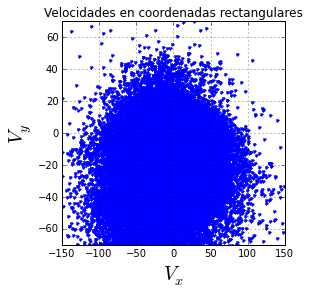

In [100]:
fig, ax = plt.subplots()
ax.grid(True)
plt.rcParams['figure.figsize'] = (4, 4)
plt.plot(vx,vy,".")

plt.xlabel("$V_x$",size=20)
plt.title("Velocidades en coordenadas rectangulares")
plt.ylabel("$V_y$",size=20)
plt.xlim(-150,150)
plt.ylim(-70,70)
plt.show()



In [17]:
vxy=[]
for i in range(0,len(vx)):
    vxy.append((vx[i],vy[i]))
vx2=[]
vy2=[]
for valor in vxy:
    if valor[0]<1000 and valor[0]>-1000 and valor[1]<600 and valor[1]>-600:
        vx2.append(valor[0])
        vy2.append(valor[1])


A continuación varias formas de ver los resultados:

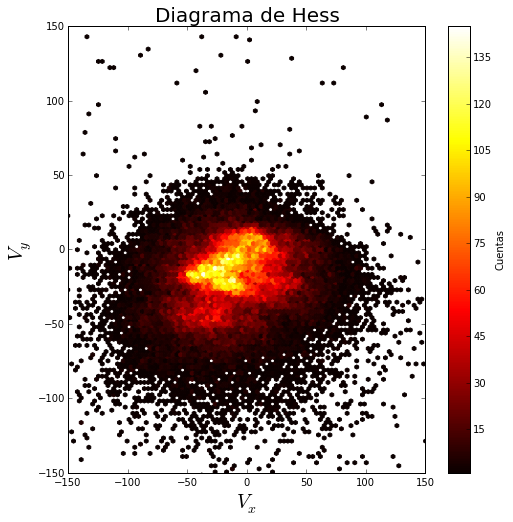

In [102]:
plt.rcParams['figure.figsize'] = (8, 8)
plt.hexbin(vx2,vy2,gridsize=500,mincnt=1,cmap="hot")
leg1=plt.colorbar()
leg1.set_label('Cuentas')

plt.title("Diagrama de Hess",size=20)
plt.xlabel("$V_x$",size=20)
plt.ylabel("$V_y$",size=20)
plt.xlim(-150,150)
plt.ylim(-150,150)
plt.show()

Será mejor para ver estructuras usar un mapa de contornos:

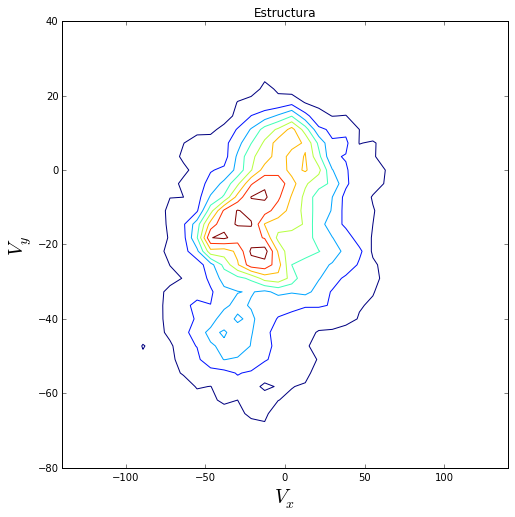

In [94]:
fig,ax=plt.subplots()
counts,xbins,ybins,image=ax.hist2d(vx,vy,bins=34,range=[[-140,140],[-80,40]],cmap="hot")
ax.clear()
ax.contour(counts.transpose(),9,extent=(-140,140,-80,40))
plt.xlabel("$V_x$",size=20)
plt.ylabel("$V_y$",size=20)
plt.title("Estructura")

Comparando con Bovy et al 2009 (Fig 21) se pueden reconocer las zonas de Sirius (arriba), NGC1901(centro),Hyades (izquierda abajo) y Pleiades (izquierda derecha). 

La publicación mencionada previamente fue hecha con los datos de Hipparcos, misión la cual tenia de proposito la astrometría (posiciones de objetos celestes). 

Estos gráficos fueron hechos con los datos de Gaia, por lo tanto se puede confirmar lo obtenido por Hipparcos, excepto la estructura de Arcturus. Hercules pareciese verse en esta estructura en la parte inferior, pero no es tan claro como las anteriores